In [1]:
#load data
import os
import sys
import random
import warnings
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
import numpy as np
import pandas as pd
os.chdir('C:/Users/s4547877/Downloads/')

In [2]:
input_PATH='./ISIC2018_Task1-2_Training_Input_x2/'

input_ids = next(os.walk(input_PATH))[2]  

In [3]:
truth_PATH='./ISIC2018_Task1_Training_GroundTruth_x2/'
truth_ids = next(os.walk(truth_PATH))[2] 

In [21]:
image_size=[256,256]
#image_resize=[256,256]

In [22]:
X_input = np.zeros((len(input_ids), image_size[0],image_size[1],3), dtype=np.uint8)
Y_input = np.zeros((len(input_ids), image_size[0],image_size[1],1), dtype=np.uint8)

In [23]:
print(input_PATH + input_ids[0])

./ISIC2018_Task1-2_Training_Input_x2/ISIC_0000000.jpg


(384, 511, 3)
(384, 511)


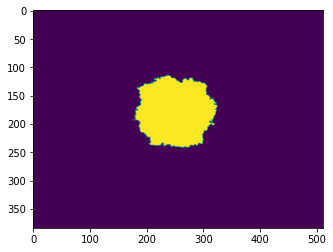

In [49]:
import matplotlib.pyplot as plt
img = imread(input_PATH + input_ids[1])
#img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
print(img.shape)
# plt.imshow(img)
# plt.show()
img1 = imread(truth_PATH + truth_ids[1])
print(img1.shape)
plt.imshow(img1)
plt.show()

In [50]:
img1=img1/255
np.unique(img1)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.0627451 , 0.06666667, 0.07058824, 0.0745098 , 0.07843137,
       0.08235294, 0.09019608, 0.09803922, 0.10196078, 0.10588235,
       0.10980392, 0.11372549, 0.11764706, 0.1254902 , 0.12941176,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.17254902, 0.17647059,
       0.18039216, 0.18431373, 0.18823529, 0.19215686, 0.19607843,
       0.2       , 0.20392157, 0.20784314, 0.21176471, 0.21568627,
       0.21960784, 0.22352941, 0.22745098, 0.23137255, 0.23529412,
       0.23921569, 0.24313725, 0.24705882, 0.25098039, 0.25882353,
       0.2627451 , 0.26666667, 0.27058824, 0.2745098 , 0.27843137,
       0.28235294, 0.28627451, 0.29019608, 0.29411765, 0.30196078,
       0.30588235, 0.30980392, 0.31372549, 0.31764706, 0.32156

In [11]:
X = []
y = []
for f in os.listdir(input_PATH):
    #print(f"{f} is a input image")
    y.append(f)
for i in os.listdir(truth_PATH):
    #print(f"{i} is an label image")
    X.append(i)

print(len(X))
print(len(y))

2594
2594


In [26]:
from tqdm import tqdm
sys.stdout.flush()
for n, id_ in tqdm(enumerate(input_ids), total=len(input_ids)):
    img = imread(input_PATH + id_ )   
    img = resize(img, (image_size[0], image_size[1]), mode='constant', preserve_range=True)
    #img = np.expand_dims(img,-1)
    X_input[n] = img

100%|██████████████████████████████████████████████████████████████████████████████| 2594/2594 [10:27<00:00,  4.13it/s]


In [30]:
sys.stdout.flush()
for n, id_ in tqdm(enumerate(truth_ids), total=len(truth_ids)):
    label = imread(truth_PATH + id_ )
    label = resize(label, (image_size[0], image_size[1]), mode='constant', preserve_range=True)
    label = np.expand_dims(label,-1)
    Y_input[n] = label

100%|██████████████████████████████████████████████████████████████████████████████| 2594/2594 [02:59<00:00, 14.48it/s]


In [34]:
!pip install sklearn

In [47]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X_input,Y_input, test_size=0.20)

In [48]:
print(X_train.shape)

(2075, 256, 256, 3)


In [56]:
y_train=y_train/255
y_test=y_test/255

In [57]:
np.unique(y_train)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [ ]:
nonzero_idxs = np.where(y_train >= 0.5)[0]
y_train[nonzero_idxs] = 1

In [ ]:
nonzero_idxs = np.where(y_train < 0.5)[0]
y_train[nonzero_idxs] = 0

In [ ]:
nonzero_idxs = np.where(y_test >= 0.5)[0]
y_test[nonzero_idxs] = 1

In [ ]:
nonzero_idxs = np.where(y_test < 0.5)[0]
y_test[nonzero_idxs] = 0